<a href="https://colab.research.google.com/github/DeepRoy105/AI-ML-projects/blob/main/movieclassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
import re
import string
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import transformers


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Importing dataset from Local Files

In [ ]:
# import training and testing data
from google.colab import files
files.upload()

Saving test_data.txt to test_data.txt


  Loading Datasets

In [ ]:
#Loading the train dataset
train_path="/content/train_data.txt"
train_data= pd.read_csv(train_path,sep=':::', names=['TITLE','GENRE','DESCRIPTION'],engine='python')
train_data

,TITLE,GENRE,DESCRIPTION
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
9556,No Stone Unturned (2017),documentary,Alex Gibney reopens the mysterious unsolved c...
9557,La vraie nature de Bernadette (1972),drama,A woman imbued with naturalistic and libertar...
9558,The Comedy of Errors (2012),comedy,Mendocino College Theatre Department presents...
9559,Beyond Good & Evil (2008),drama,Chris Peterson is an aging homicide detective...


In [ ]:
#loading the test dataset
test_path="/content/test_data.txt"
test_data=pd.read_csv(test_path,sep=':::', names=['TITLE','DISCRIPTION'],engine='python')
test_data

,TITLE,DISCRIPTION
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),Before he was known internationally as a mart...
...,...,...
47461,Redemption Process (2016),A politically ambitious Senator enables a tea...
47462,Le sorelle (1969),"Diana's marriage has ended in divorce, so she..."
47463,Thundering Herd (2009),A full dome planetarium show educating viewer...
47464,Oboro: Lord of the Lies (2007),Demise is promised when the forest whispers -...


**DATA PREPROCESSING**

In [ ]:
#EXPLORATORY DATA ANALYSIS(EDA)
train_data.describe()

,TITLE,GENRE,DESCRIPTION
count,9560,9560,9560
unique,9560,27,9556
top,Oscar et la dame rose (2009),drama,Award of the American academy of cinematograp...
freq,1,2365,3


In [ ]:
#EDA
test_data.describe()

,TITLE,DISCRIPTION
count,47465,47465
unique,47465,47358
top,Edgar's Lunch (1998),Grammy - music award of the American academy ...
freq,1,10


In [ ]:
train_data.isnull().sum()

TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

In [ ]:
test_data.isnull().sum()

TITLE          0
DISCRIPTION    0
dtype: int64

In [ ]:
# Initialize the stemmer and stop words
stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))
#Function to clean description
def clean_description(text):
    text = text.lower()  # Lowercase all characters
    text = re.sub(r'@\S+', '', text)  # Remove Twitter handles
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']", ' ', text)  # Keep only characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')  # Keep words with length > 1 only
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')  # Remove stopwords
    text = " ".join([i for i in words if i not in stopwords and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip()  # Remove repeated/leading/trailing spaces
    return text

# Apply cleaning function to Description column
train_data['Clean_Description'] = train_data['DESCRIPTION'].apply(clean_description)
test_data['Clean_Description'] = test_data['DISCRIPTION'].apply(clean_description)

In [ ]:
train_data

,TITLE,GENRE,DESCRIPTION,Clean_Description,Description_Length
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents year old...,546
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...,184
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...,650
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...,1082
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,films title refers recovered bodies ground zer...,625
...,...,...,...,...,...
9556,No Stone Unturned (2017),documentary,Alex Gibney reopens the mysterious unsolved c...,alex gibney reopens mysterious unsolved case r...,390
9557,La vraie nature de Bernadette (1972),drama,A woman imbued with naturalistic and libertar...,woman imbued naturalistic libertarian theories...,358
9558,The Comedy of Errors (2012),comedy,Mendocino College Theatre Department presents...,mendocino college theatre department presents ...,479
9559,Beyond Good & Evil (2008),drama,Chris Peterson is an aging homicide detective...,chris peterson aging homicide detective trying...,537


In [ ]:
test_data

,TITLE,DISCRIPTION,Clean_Description
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",brane loves life car apartment job especially ...
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child three belongin...
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,one year life albin family shepherds north tra...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father died hasnt spoken brother years serious...
5,Er nu zhai (1955),Before he was known internationally as a mart...,known internationally martial arts superstar b...
...,...,...,...
47461,Redemption Process (2016),A politically ambitious Senator enables a tea...,politically ambitious senator enables team rou...
47462,Le sorelle (1969),"Diana's marriage has ended in divorce, so she...",dianas marriage ended divorce goes stay younge...
47463,Thundering Herd (2009),A full dome planetarium show educating viewer...,full dome planetarium show educating viewers h...
47464,Oboro: Lord of the Lies (2007),Demise is promised when the forest whispers -...,demise promised forest whispers mystical fores...


In [ ]:
# Initializing the lemmatizer and stop words
from nltk.corpus import stopwords
lemmatizer= WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

#function to clean description
def clean_description(text):
  text = text.lower() # lowercases all characters
  text = re.sub(r'@\S+','',text) # remove all the twitter tags
  text = re.sub(r'http\S+','',text) # remove all the URLS
  text = re.sub(r'pic.\S+','',text)
  text = re.sub(r"[^a-zA-Z+']",' ',text) # keep only characters
  text = re.sub(r'\s+[a-zA-Z]\s+',' ', text + ' ') # keeps the words with length > 1 only
  text = "".join([i for i in text if i not in string.punctuation])
  words = nltk.word_tokenize(text)
  stopwords = nltk.corpus.stopwords.words('english') # remove stopwords
  text = " ".join([lemmatizer.lemmatize(word) for word in words if word not in stop_words and len(word) > 2])
  return text


# Apply cleaning function to the description column
train_data['clean_description'] = train_data['DESCRIPTION'].apply(clean_description)


Visualizing Data

In [ ]:
class_distribution = train_data['GENRE'].value_counts()
print("Class Distribution")
class_distribution

Class Distribution


GENRE
 drama           2365
 documentary     2307
 comedy          1308
 short            897
 horror           379
 thriller         313
 action           236
 western          194
 reality-tv       159
 family           138
 music            130
 adventure        129
 romance          114
 sci-fi           114
 adult            114
 animation         85
 sport             78
 crime             74
 talk-show         71
 fantasy           65
 mystery           56
 musical           52
 biography         47
 history           45
 game-show         37
 news              31
 war               22
Name: count, dtype: int64

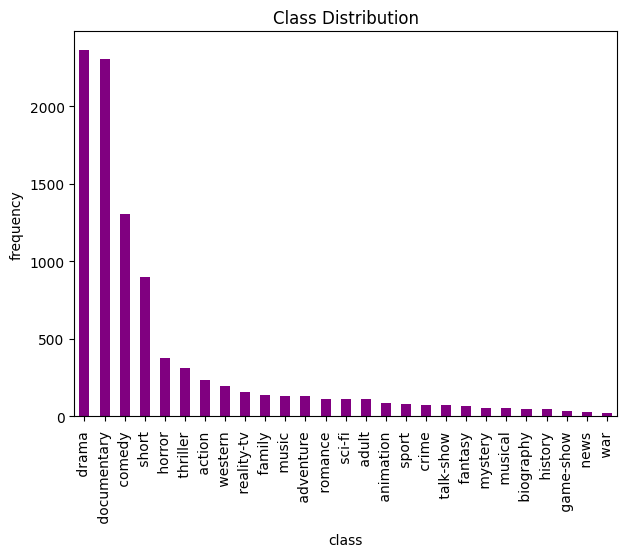

In [ ]:
plt.figure(figsize=(7,5))
class_distribution.plot(kind='bar',color='purple')
plt.title('Class Distribution')
plt.xlabel('class')
plt.ylabel('frequency')
plt.xticks(rotation=90)
plt.show()

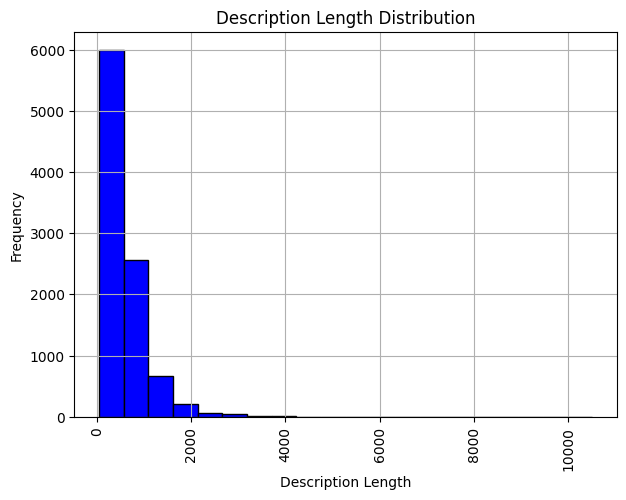

In [ ]:
train_data['Description_Length'] =train_data['DESCRIPTION'].apply(len)
plt.figure(figsize=(7,5))
train_data['Description_Length'].hist(bins=20, color='blue', edgecolor='black')
plt.title('Description Length Distribution')
plt.xlabel('Description Length')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

<ipython-input-18-cba1f7f39c09>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, y="GENRE", order=train_data["GENRE"].value_counts().index, palette= palette)
<ipython-input-18-cba1f7f39c09>:4: UserWarning: 
The palette list has fewer values (10) than needed (27) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=train_data, y="GENRE", order=train_data["GENRE"].value_counts().index, palette= palette)


<function matplotlib.pyplot.show(close=None, block=None)>

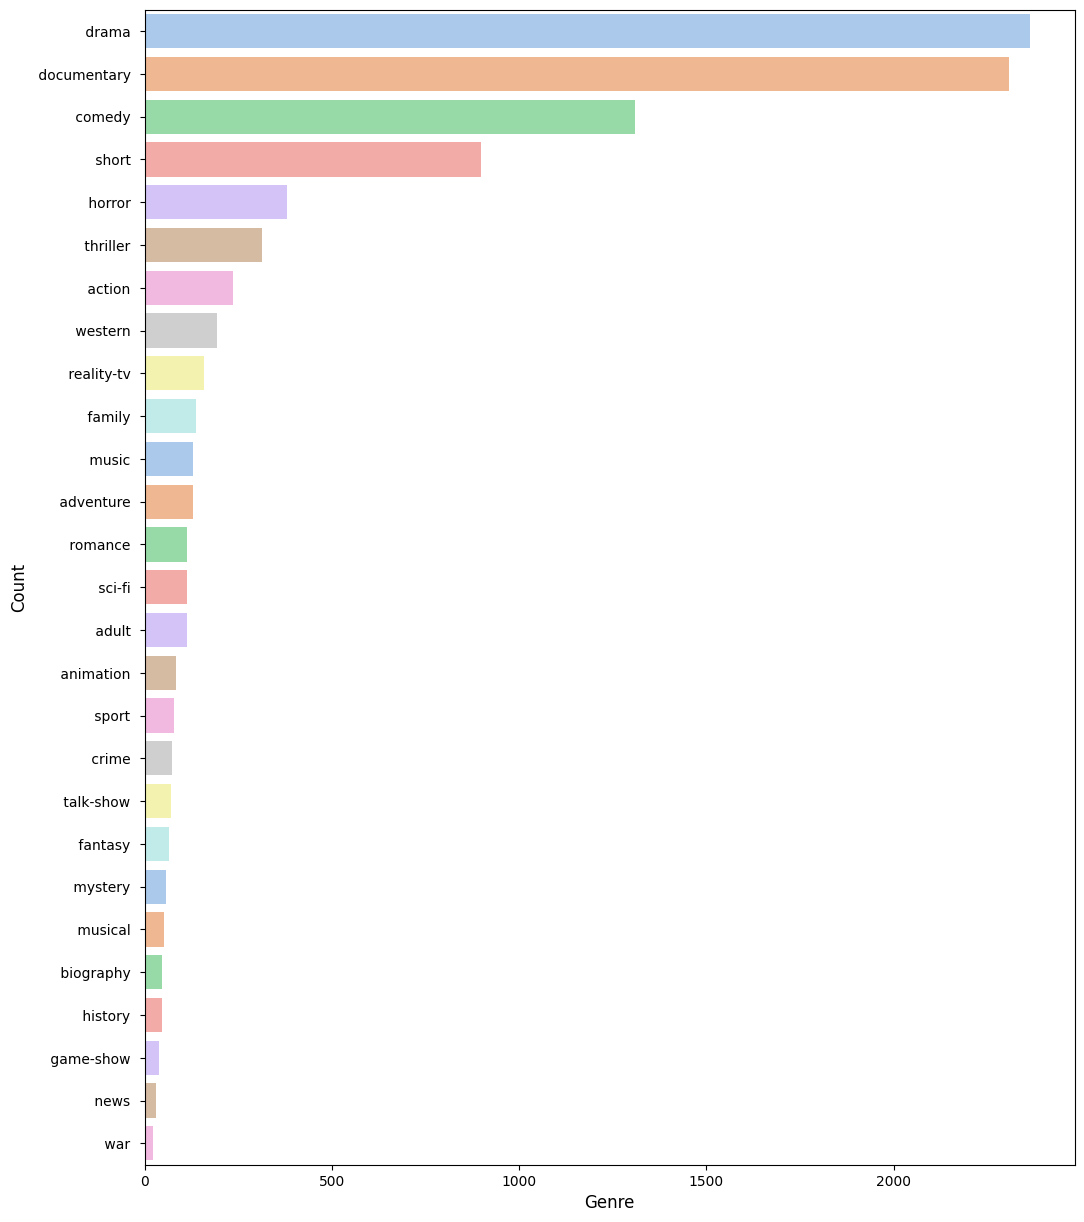

In [ ]:
#Plot genre counts
palette = sns.color_palette("pastel")
plt.figure(figsize=(12,15))
sns.countplot(data=train_data, y="GENRE", order=train_data["GENRE"].value_counts().index, palette= palette)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.show

In [ ]:
print(train_data.columns)
print(test_data.columns)

Index(['TITLE', 'GENRE', 'DESCRIPTION'], dtype='object')
Index(['TITLE', 'DISCRIPTION'], dtype='object')


***MODELLING***

In [ ]:
#tokenization


In [ ]:
# using TF-IDF to vectorize the data
vectorize = TfidfVectorizer()
x_train = vectorize.fit_transform(train_data["Clean_Description"])
x_test = vectorize.transform(test_data["Clean_Description"])

In [ ]:
model = SVC()
model.fit(x_train, y_train)

SVC()

In [ ]:
model.score(x_train,y_train)

0.9046597957160315